<a href="https://colab.research.google.com/github/Rexends/Base-de-datos/blob/main/Santiago_villegas_orozco_Analsis_de_los_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Habilidades digitales inteligencia artificial

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import scipy.stats as stats


In [3]:
# módulos estándar: numpy, pandas, pyplot, seaborn, stats, statsmodels, os


%matplotlib inline
plt.style.use('ggplot')
# temas y estilos para seaborn
sns.set_theme(color_codes=True)
sns.set_style("darkgrid") # whitegrid

In [6]:
url = 'https://raw.githubusercontent.com/Rexends/Base-de-datos/main/Habilidades_digitales_inteligencia_artificial.csv'
df = pd.read_csv(url)

In [7]:
# ver un ejemplo de los datos en el dataframe
df.head()

,FECHA_CORTE,DEPARTAMENTO,MUNICIPIO,GENERO,EDAD,CONVOCATORIA,ESTADOS,PLATAFORMA_EDUCATIVA,ESTADO_FORMACION,META_BENEFICIARIOS,META_DINERO,INVERSION,FECHA_VIGENCIA
0,1900-01-01,RISARALDA,DOSQUEBRADAS,FEMENINO,47,ICETEX,ASPIRANTES,0,PENDIENTE CLASIFICAR,0,0,0,1900-01-01
1,2019-12-31,CUNDINAMARCA,ZIPAQUIRA,MASCULINO,31,ICETEX,BENEFICIARIO,COURSERA,GRADUADO,4413,9000000000,2039429,2019-12-31
2,2019-12-31,VALLE DEL CAUCA,CAICEDONIA,NO REGISTRA,0,TECNALIA,ASPIRANTES,EDX,PENDIENTE CLASIFICAR,0,0,0,2019-12-31
3,2019-12-31,CUNDINAMARCA,COTA,NO REGISTRA,0,TECNALIA,ASPIRANTES,COURSERA,PENDIENTE CLASIFICAR,0,0,0,2019-12-31
4,1900-01-01,NARIÑO,PASTO,FEMENINO,44,ICETEX,ASPIRANTES,0,PENDIENTE CLASIFICAR,0,0,0,1900-01-01


# qué puede decir acerca de los datos en el dataframe?
Los datos estan relacionados con programas de formación, convocatorias y metas en el ámbito educativo.

# Datos faltantes o registros nulos:

En algunas filas, hay valores que no están registrados o tienen datos que podrían ser incompletos (como "NO REGISTRA" o valores nulos).

# Convocatorias y estado de formación:

Hay información sobre diferentes convocatorias (ICETEX, TECNALIA, entre otras) y estados de formación (aspirantes, beneficiarios, graduados, etc.).

# Metas y financiamiento:

Existen metas tanto en número de beneficiarios como en el dinero invertido en ciertos programas o convocatorias.

#Fechas:

Las fechas de corte, fechas de vigencia y fechas de la información podrían ser relevantes para el análisis temporal de los datos.

#Plataforma educativa:

Se mencionan diferentes plataformas educativas (COURSERA, EDX, etc.) que podrían estar asociadas con la formación o programas educativos.

# NUMERO DE COLUMNAS Y FILAS

In [8]:
print("Número de filas y columnas:", df.shape)

Número de filas y columnas: (77919, 13)


# TIPOS DE DATOS

In [9]:
print("Tipo de datos de las columnas:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77919 entries, 0 to 77918
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   FECHA_CORTE           77919 non-null  object
 1   DEPARTAMENTO          77919 non-null  object
 2   MUNICIPIO             77919 non-null  object
 3   GENERO                77919 non-null  object
 4   EDAD                  77919 non-null  int64 
 5   CONVOCATORIA          77919 non-null  object
 6   ESTADOS               77919 non-null  object
 7   PLATAFORMA_EDUCATIVA  77919 non-null  object
 8   ESTADO_FORMACION      77919 non-null  object
 9   META_BENEFICIARIOS    77919 non-null  int64 
 10  META_DINERO           77919 non-null  int64 
 11  INVERSION             77919 non-null  int64 
 12  FECHA_VIGENCIA        77919 non-null  object
dtypes: int64(4), object(9)
memory usage: 7.7+ MB
Tipo de datos de las columnas:
 None


In [11]:
print("Tabla NumPy:\n", np.array(df.head()))
print("Tabla Pandas:\n", df.describe())

Tabla NumPy:
 [['1900-01-01' 'RISARALDA' 'DOSQUEBRADAS' 'FEMENINO' 47 'ICETEX'
  'ASPIRANTES' '0' 'PENDIENTE CLASIFICAR' 0 0 0 '1900-01-01']
 ['2019-12-31' 'CUNDINAMARCA' 'ZIPAQUIRA' 'MASCULINO' 31 'ICETEX'
  'BENEFICIARIO' 'COURSERA' 'GRADUADO' 4413 9000000000 2039429
  '2019-12-31']
 ['2019-12-31' 'VALLE DEL CAUCA' 'CAICEDONIA' 'NO REGISTRA' 0 'TECNALIA'
  'ASPIRANTES' 'EDX' 'PENDIENTE CLASIFICAR' 0 0 0 '2019-12-31']
 ['2019-12-31' 'CUNDINAMARCA' 'COTA' 'NO REGISTRA' 0 'TECNALIA'
  'ASPIRANTES' 'COURSERA' 'PENDIENTE CLASIFICAR' 0 0 0 '2019-12-31']
 ['1900-01-01' 'NARIÑO' 'PASTO' 'FEMENINO' 44 'ICETEX' 'ASPIRANTES' '0'
  'PENDIENTE CLASIFICAR' 0 0 0 '1900-01-01']]
Tabla Pandas:
                EDAD  META_BENEFICIARIOS   META_DINERO     INVERSION
count  77919.000000        77919.000000  7.791900e+04  7.791900e+04
mean      26.105571          527.222077  1.075232e+09  2.436510e+05
std       15.959981         1431.326028  2.919088e+09  6.614747e+05
min        0.000000            0.000000

In [13]:
selected_data = df.iloc[:, 1:3]

In [15]:
print("Valor mínimo:\n", df.min())


Valor mínimo:
 FECHA_CORTE             1900-01-01
DEPARTAMENTO              AMAZONAS
MUNICIPIO                ABEJORRAL
GENERO                    FEMENINO
EDAD                             0
CONVOCATORIA                ICETEX
ESTADOS                 ASPIRANTES
PLATAFORMA_EDUCATIVA             0
ESTADO_FORMACION          GRADUADO
META_BENEFICIARIOS               0
META_DINERO                      0
INVERSION                        0
FECHA_VIGENCIA          1900-01-01
dtype: object


In [16]:
print("Valor máximo:\n", df.max())


Valor máximo:
 FECHA_CORTE                       2019-12-31
DEPARTAMENTO                         VICHADA
MUNICIPIO                      ZONA BANANERA
GENERO                           NO REGISTRA
EDAD                                     119
CONVOCATORIA                        TECNALIA
ESTADOS                         BENEFICIARIO
PLATAFORMA_EDUCATIVA                 UDACITY
ESTADO_FORMACION        PENDIENTE CLASIFICAR
META_BENEFICIARIOS                      4413
META_DINERO                       9000000000
INVERSION                            2039429
FECHA_VIGENCIA                    2019-12-31
dtype: object


In [17]:
print("Sumatoria:\n", df.sum())


Sumatoria:
 FECHA_CORTE             1900-01-012019-12-312019-12-312019-12-311900-0...
DEPARTAMENTO            RISARALDACUNDINAMARCAVALLE DEL CAUCACUNDINAMAR...
MUNICIPIO               DOSQUEBRADASZIPAQUIRACAICEDONIACOTAPASTOGUADUA...
GENERO                  FEMENINOMASCULINONO REGISTRANO REGISTRAFEMENIN...
EDAD                                                              2034120
CONVOCATORIA            ICETEXICETEXTECNALIATECNALIAICETEXICETEXICETEX...
ESTADOS                 ASPIRANTESBENEFICIARIOASPIRANTESASPIRANTESASPI...
PLATAFORMA_EDUCATIVA    0COURSERAEDXCOURSERA000000000000000000000DATAC...
ESTADO_FORMACION        PENDIENTE CLASIFICARGRADUADOPENDIENTE CLASIFIC...
META_BENEFICIARIOS                                               41080617
META_DINERO                                                83781000000000
INVERSION                                                     18985044561
FECHA_VIGENCIA          1900-01-012019-12-312019-12-312019-12-311900-0...
dtype: object


In [18]:
print("Media:\n", df.mean())


Media:
 EDAD                  2.610557e+01
META_BENEFICIARIOS    5.272221e+02
META_DINERO           1.075232e+09
INVERSION             2.436510e+05
dtype: float64


<ipython-input-18-a83cbb8583a1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Media:\n", df.mean())


In [19]:
print("Desviación Estándar:\n", df.std())

Desviación Estándar:
 EDAD                  1.595998e+01
META_BENEFICIARIOS    1.431326e+03
META_DINERO           2.919088e+09
INVERSION             6.614747e+05
dtype: float64


<ipython-input-19-bad4428e29b3>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Desviación Estándar:\n", df.std())


# COEFICIENTE DE CORRELACION



In [21]:
print("Coeficiente de correlación:\n", df.corr())

Coeficiente de correlación:
                         EDAD  META_BENEFICIARIOS  META_DINERO  INVERSION
EDAD                1.000000           -0.213205    -0.213205  -0.213205
META_BENEFICIARIOS -0.213205            1.000000     1.000000   1.000000
META_DINERO        -0.213205            1.000000     1.000000   1.000000
INVERSION          -0.213205            1.000000     1.000000   1.000000


<ipython-input-21-ec5181158030>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Coeficiente de correlación:\n", df.corr())


# ANALISIS DE LOS DATOS


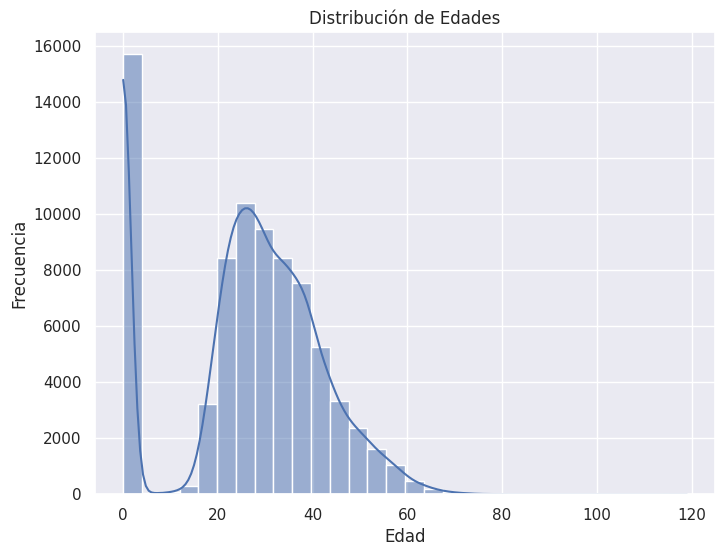

In [25]:
# Histograma de distribución de edades
plt.figure(figsize=(8, 6))
sns.histplot(df['EDAD'], bins=30, kde=True)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades')
plt.show()

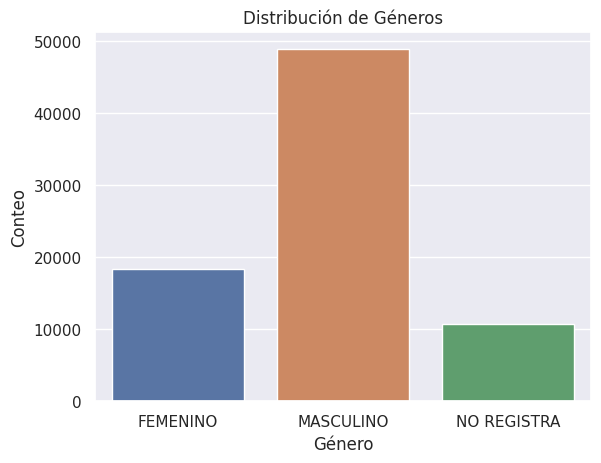

In [26]:
# Gráfico de barras para comparar géneros
sns.countplot(x='GENERO', data=df)
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.title('Distribución de Géneros')
plt.show()

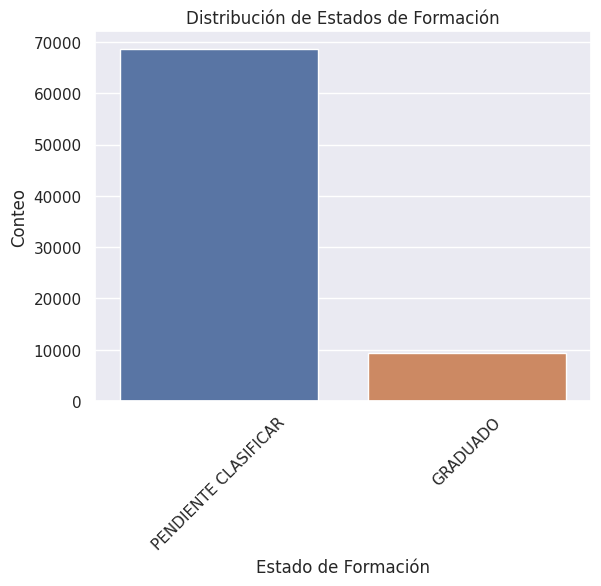

In [28]:
# Gráfico de barras para estados de formación
sns.countplot(x='ESTADO_FORMACION', data=df)
plt.xlabel('Estado de Formación')
plt.ylabel('Conteo')
plt.title('Distribución de Estados de Formación')
plt.xticks(rotation=45)
plt.show()

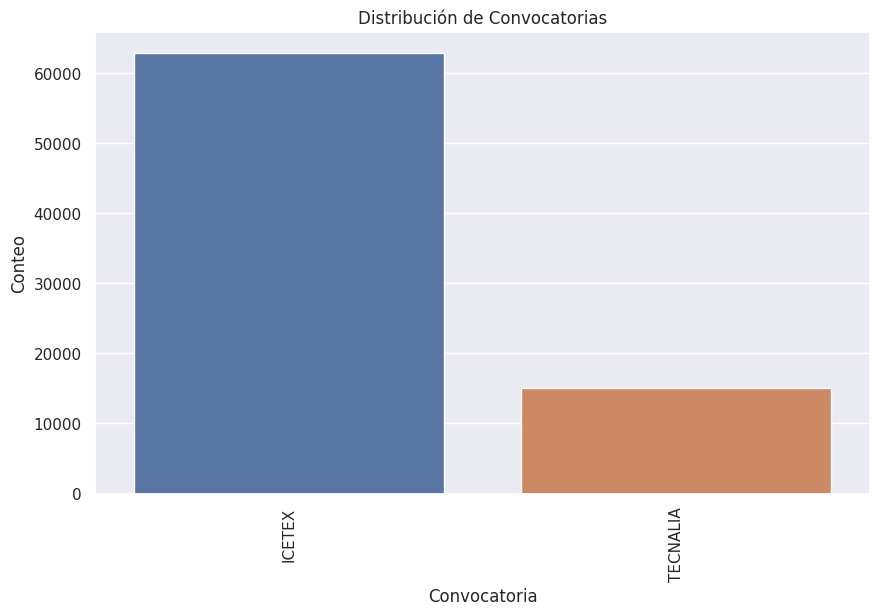

In [29]:
# Gráfico de barras para convocatorias
plt.figure(figsize=(10, 6))
sns.countplot(x='CONVOCATORIA', data=df, order=df['CONVOCATORIA'].value_counts().index)
plt.xlabel('Convocatoria')
plt.ylabel('Conteo')
plt.title('Distribución de Convocatorias')
plt.xticks(rotation=90)
plt.show()

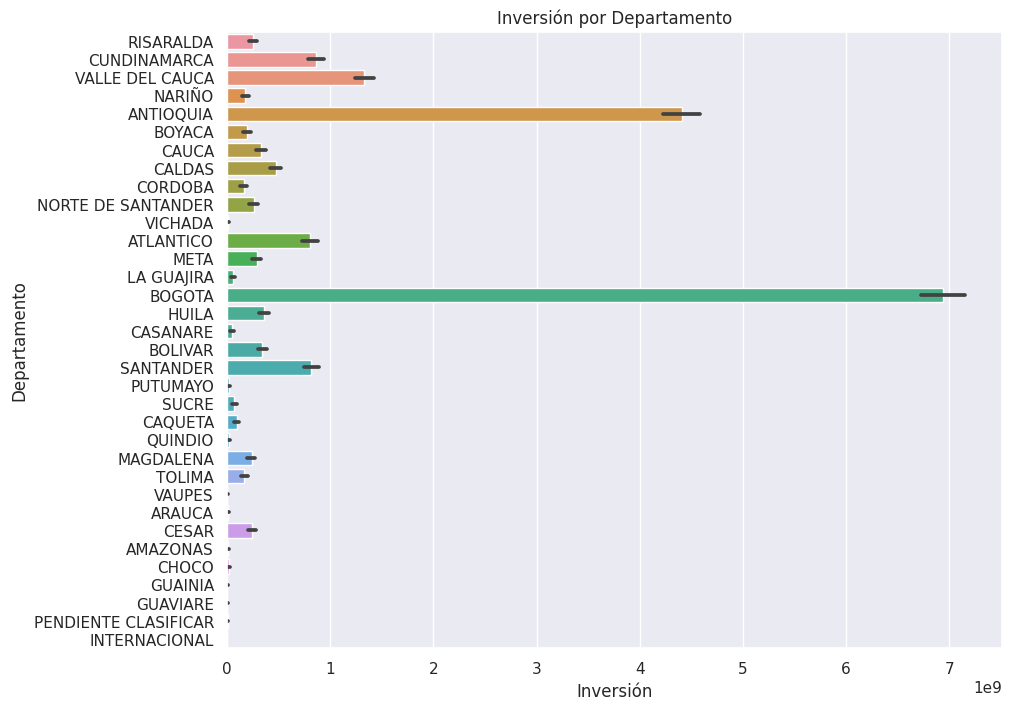

In [30]:
# Gráfico de barras horizontales para visualizar la inversión por departamento
plt.figure(figsize=(10, 8))
sns.barplot(x='INVERSION', y='DEPARTAMENTO', data=df, estimator=sum)
plt.xlabel('Inversión')
plt.ylabel('Departamento')
plt.title('Inversión por Departamento')
plt.show()

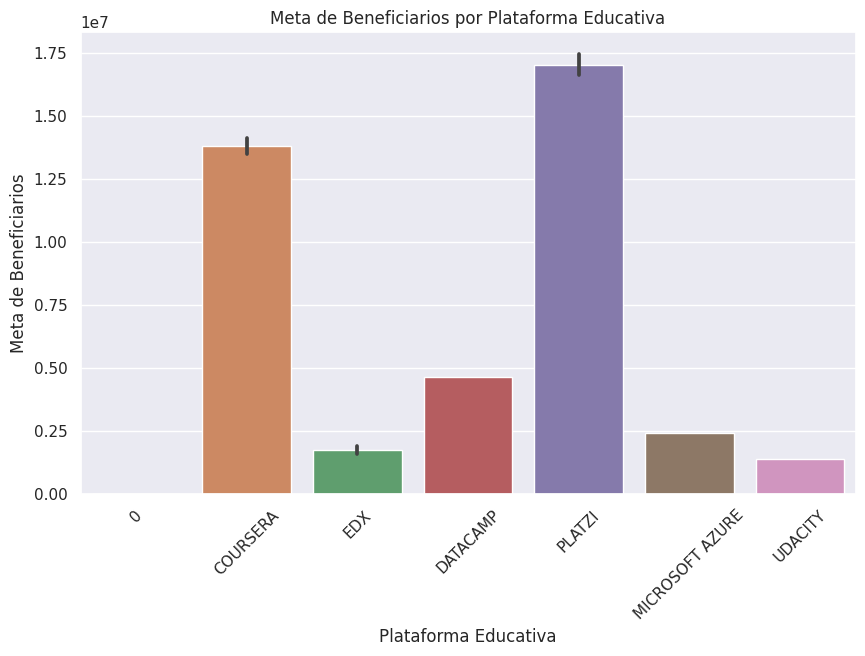

In [31]:
# Gráfico de barras para comparar la meta de beneficiarios por plataforma educativa
plt.figure(figsize=(10, 6))
sns.barplot(x='PLATAFORMA_EDUCATIVA', y='META_BENEFICIARIOS', data=df, estimator=sum)
plt.xlabel('Plataforma Educativa')
plt.ylabel('Meta de Beneficiarios')
plt.title('Meta de Beneficiarios por Plataforma Educativa')
plt.xticks(rotation=45)
plt.show()

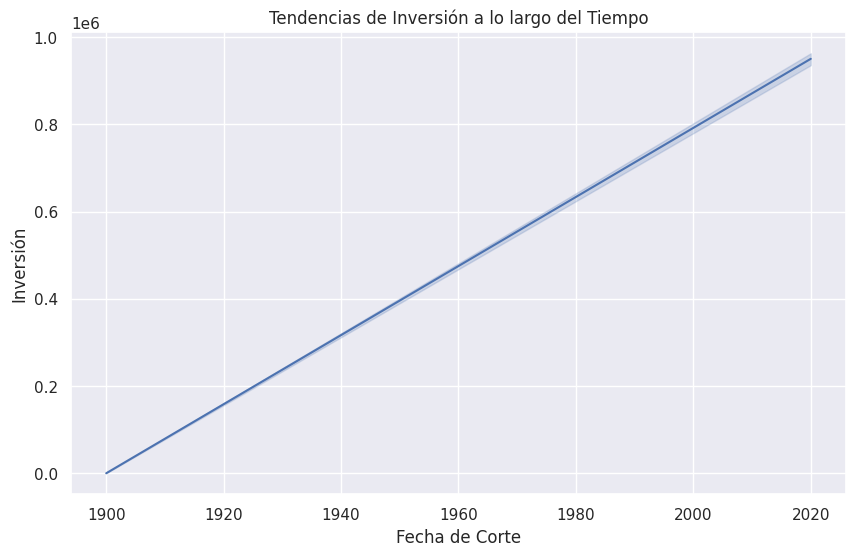

In [32]:
# Convertir FECHA_CORTE a tipo datetime si aún no está en ese formato
df['FECHA_CORTE'] = pd.to_datetime(df['FECHA_CORTE'])

# Gráfico de línea para mostrar tendencias de inversión a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(x='FECHA_CORTE', y='INVERSION', data=df)
plt.xlabel('Fecha de Corte')
plt.ylabel('Inversión')
plt.title('Tendencias de Inversión a lo largo del Tiempo')
plt.show()

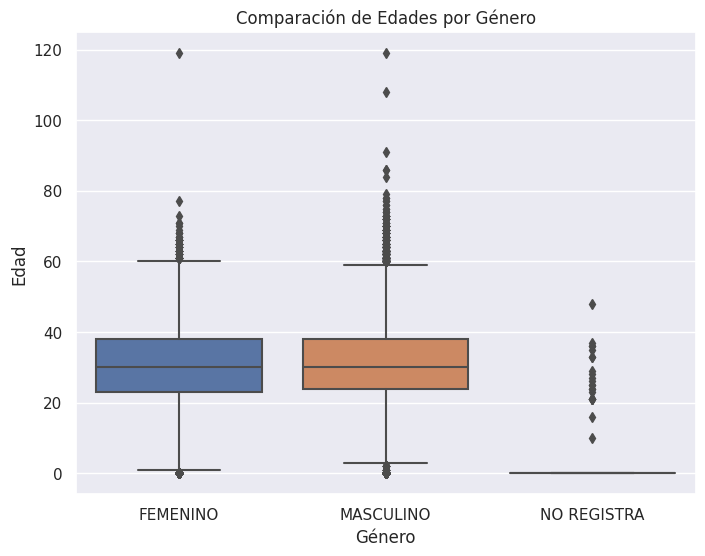

In [33]:
# Boxplot para comparar la edad por género
plt.figure(figsize=(8, 6))
sns.boxplot(x='GENERO', y='EDAD', data=df)
plt.xlabel('Género')
plt.ylabel('Edad')
plt.title('Comparación de Edades por Género')
plt.show()

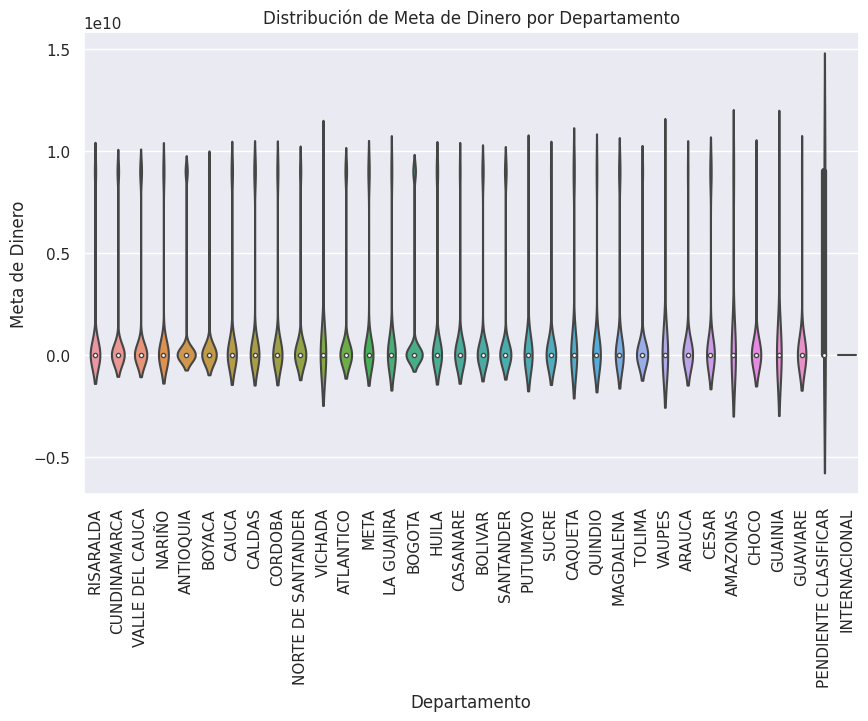

In [34]:
# Gráfico de violín para visualizar la distribución de la meta de dinero por departamento
plt.figure(figsize=(10, 6))
sns.violinplot(x='DEPARTAMENTO', y='META_DINERO', data=df)
plt.xlabel('Departamento')
plt.ylabel('Meta de Dinero')
plt.title('Distribución de Meta de Dinero por Departamento')
plt.xticks(rotation=90)
plt.show()

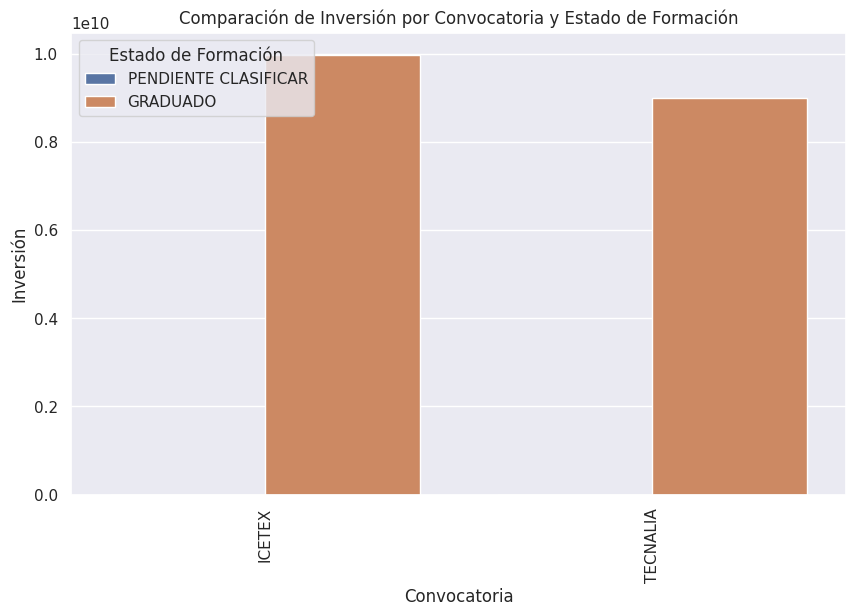

In [35]:
# Gráfico de barras apiladas para comparar la inversión por convocatoria y estado de formación
plt.figure(figsize=(10, 6))
sns.barplot(x='CONVOCATORIA', y='INVERSION', hue='ESTADO_FORMACION', data=df, estimator=sum)
plt.xlabel('Convocatoria')
plt.ylabel('Inversión')
plt.title('Comparación de Inversión por Convocatoria y Estado de Formación')
plt.xticks(rotation=90)
plt.legend(title='Estado de Formación')
plt.show()


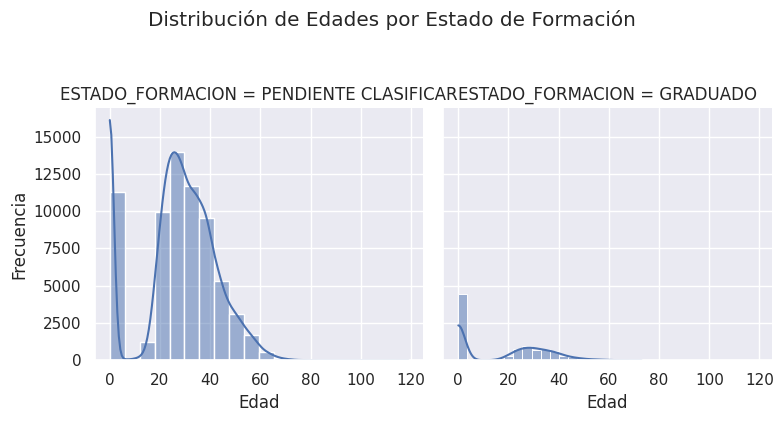

In [36]:
# Histogramas de la edad agrupados por estado de formación
g = sns.FacetGrid(df, col='ESTADO_FORMACION', height=4)
g.map_dataframe(sns.histplot, x='EDAD', bins=20, kde=True)
g.set_axis_labels('Edad', 'Frecuencia')
g.fig.suptitle('Distribución de Edades por Estado de Formación', y=1.05)
plt.tight_layout()
plt.show()


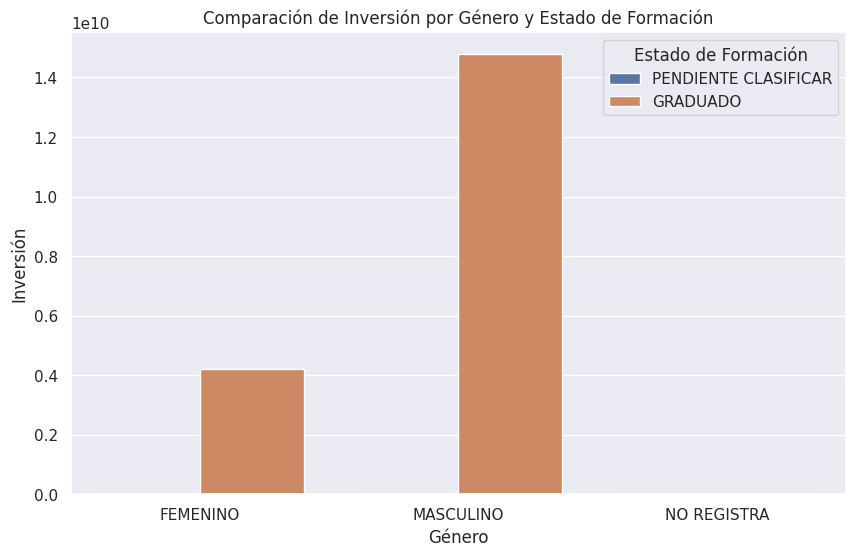

In [37]:
# Gráfico de barras agrupadas para comparar la inversión por género y estado de formación
plt.figure(figsize=(10, 6))
sns.barplot(x='GENERO', y='INVERSION', hue='ESTADO_FORMACION', data=df, estimator=sum)
plt.xlabel('Género')
plt.ylabel('Inversión')
plt.title('Comparación de Inversión por Género y Estado de Formación')
plt.legend(title='Estado de Formación')
plt.show()
